In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [ ]:
df=pd.read_csv("Play Tennis.csv")
value=['Outlook','Temprature','Humidity','Wind']
df

,Unnamed: 0,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,0,D1,Sunny,Hot,High,Weak,No
1,1,D2,Sunny,Hot,High,Strong,No
2,2,D3,Overcast,Hot,High,Weak,Yes
3,3,D4,Rain,Mild,High,Weak,Yes
4,4,D5,Rain,Cool,Normal,Weak,Yes
5,5,D6,Rain,Cool,Normal,Strong,No
6,6,D7,Overcast,Cool,Normal,Strong,Yes
7,7,D8,Sunny,Mild,High,Weak,No
8,8,D9,Sunny,Cool,Normal,Weak,Yes
9,9,D10,Rain,Mild,Normal,Weak,Yes


In [ ]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                
df=df.apply(string_to_int.fit_transform) 
df

,Unnamed: 0,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,0,0,2,1,0,1,0
1,1,6,2,1,0,0,0
2,2,7,0,1,0,1,1
3,3,8,1,2,0,1,1
4,4,9,1,0,1,1,1
5,5,10,1,0,1,0,0
6,6,11,0,0,1,0,1
7,7,12,2,2,0,1,0
8,8,13,2,0,1,1,1
9,9,1,1,2,1,1,1


In [ ]:
feature_cols = ['Outlook','Temprature','Humidity','Wind']
X = df[feature_cols]                        
y = df.Play_Tennis   

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier                            
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)   
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
7,0,0
4,1,1
1,0,0
6,1,1
10,1,0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[2 0]
 [1 2]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [ ]:
import graphviz 

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

In [ ]:
import pydotplus

In [ ]:
from IPython.display import Image

In [ ]:
dot_data = StringIO()

In [ ]:
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names=value,class_names=['0','1'])

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

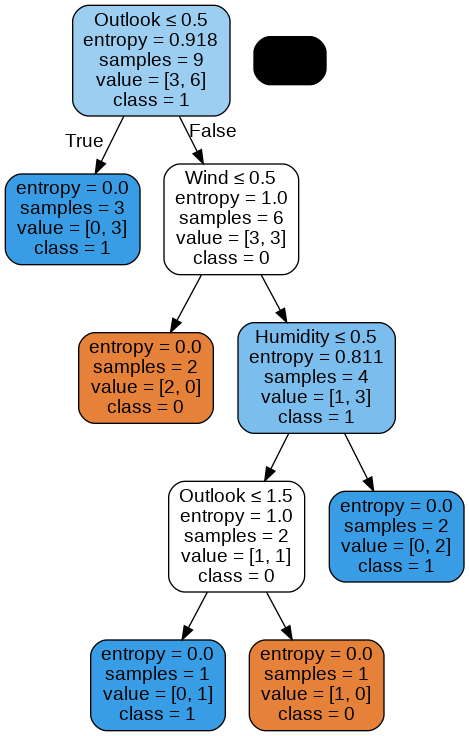

In [ ]:
Image(graph.create_png())